In [1]:
import seaborn
seaborn.set_style('whitegrid')

from pandas import read_csv
from pandas import SparseDataFrame
from pandas import concat

from numpy import int64, ravel, log10, arange, sort

from matplotlib import pyplot
%matplotlib inline

from sklearn.cluster import FeatureAgglomeration

from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

from sklearn.feature_selection import VarianceThreshold
#from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE

In [2]:
def print_categorical_encoding(_col):
    print('{}\n{}\n{}\n{}\n{}\n{}'.format(_col, _df_categorical[_col].unique(), len(_df_categorical[_col].unique()), _df_le[_col].unique(), len(_df_le[_col].unique()), 100*'='))

def print_ndim_array(_array):
    print(_array[:5,:], len(_array), type(_array), _array.shape, _array.ndim, _array.dtype.name)

In [3]:
_df_train = read_csv('./train.csv')

In [4]:
_df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# rows, cols
_df_train.shape

(4209, 378)

In [6]:
# data types
_df_train.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
X3       object
X4       object
X5       object
X6       object
X8       object
X10       int64
X11       int64
X12       int64
X13       int64
X14       int64
X15       int64
X16       int64
X17       int64
X18       int64
X19       int64
X20       int64
X21       int64
X22       int64
X23       int64
X24       int64
X26       int64
X27       int64
X28       int64
X29       int64
X30       int64
         ...   
X355      int64
X356      int64
X357      int64
X358      int64
X359      int64
X360      int64
X361      int64
X362      int64
X363      int64
X364      int64
X365      int64
X366      int64
X367      int64
X368      int64
X369      int64
X370      int64
X371      int64
X372      int64
X373      int64
X374      int64
X375      int64
X376      int64
X377      int64
X378      int64
X379      int64
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: obje

In [7]:
# categorical columns
_df_train.select_dtypes(include=['object']).head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [8]:
_df_train[_df_train.isnull().any(axis=1)]


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


In [9]:
# one hot encoding

# get categorical data
_df_categorical = _df_train.select_dtypes(include=[object])
print(_df_categorical.shape)
_df_categorical.head()

(4209, 8)


,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [10]:
# Label Encoder: encode categorical values between 0 and n_classes - 1
label_encoder = LabelEncoder()
_df_le = _df_categorical.apply(label_encoder.fit_transform)
print(_df_le.shape)
_df_le.head()

(4209, 8)


,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


In [11]:
print_categorical_encoding('X0')
print_categorical_encoding('X1')
print_categorical_encoding('X2')
print_categorical_encoding('X3')
print_categorical_encoding('X4')
print_categorical_encoding('X5')
print_categorical_encoding('X6')
print_categorical_encoding('X8')

X0
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
47
[32 20 40  9 36 43 31 29 39 35 19 27 44 45  7  8 10 46 37 15 12 42  5  0 26
  6 25 13 24  1 22 14 30 38 21 18 23 41  4 16 34 33 17 11  3 28  2]
47
X1
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
27
[23 21 24  3 19 13 20  1  4  0  6  9 26 11 16 22 17 15 10 25  5  7 14 12  8
 18  2]
27
X2
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
44
[17 19 34 25 16 14 38  7  8 33  0 31  3 39 26 24  5 21  2 13 27 29 20 42 22
 12  9 28 41 18 40 11 43  6 36 10 30 37  4 32  1 23 35 15]
44
X3
['a' 'e' 'c' 'f' 'd' 'b' 'g']
7
[0 4 2 5 3 1 6]
7
X4
['d' 'b' 'c' 'a']
4
[3 1 2

In [12]:
# one hot encoding
_1he = OneHotEncoder(categorical_features='all', dtype=int64, handle_unknown='error', n_values='auto', sparse=False)
_df_1he = _1he.fit_transform(_df_le)
print(_df_1he.shape)
print(type(_df_1he))
print(_df_1he)

(4209, 195)
<class 'numpy.ndarray'>
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 1 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 1 0 0]]


In [13]:
_df_1he = SparseDataFrame(_df_1he)

In [14]:
print(_df_1he.shape)
_df_1he.head()

(4209, 195)


,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,193,194
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# drop categorical columns
_df_train = _df_train.drop(['ID','X0','X1','X2','X3','X4','X5','X6','X8'], axis=1)
print(_df_train.shape)
_df_train.head()

(4209, 369)


,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
_df_train_1he = concat([_df_train, _df_1he], axis=1)
print(_df_train_1he.shape)
_df_train_1he.head()

(4209, 564)


,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,185,186,187,188,189,190,191,192,193,194
0,130.81,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,88.53,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,76.26,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# feature selection

In [18]:
_arr_train = _df_train_1he.values
print_ndim_array(_arr_train)

[[ 130.81    0.      0.   ...,    0.      0.      0.  ]
 [  88.53    0.      0.   ...,    0.      0.      0.  ]
 [  76.26    0.      0.   ...,    0.      1.      0.  ]
 [  80.62    0.      0.   ...,    0.      0.      0.  ]
 [  78.02    0.      0.   ...,    0.      0.      0.  ]] 4209 <class 'numpy.ndarray'> (4209, 564) 2 float64


In [19]:
_X_train = _arr_train[:,1:]
print_ndim_array(_X_train)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] 4209 <class 'numpy.ndarray'> (4209, 563) 2 float64


In [20]:
_Y_train = _arr_train[:,0:1]
print(_Y_train[:5,:], len(_Y_train), type(_Y_train), _Y_train.shape, _Y_train.ndim, _Y_train.dtype.name)
_Y_train = ravel(_Y_train)
print(_Y_train[:5], len(_Y_train), type(_Y_train), _Y_train.shape, _Y_train.ndim, _Y_train.dtype.name)

[[ 130.81]
 [  88.53]
 [  76.26]
 [  80.62]
 [  78.02]] 4209 <class 'numpy.ndarray'> (4209, 1) 2 float64
[ 130.81   88.53   76.26   80.62   78.02] 4209 <class 'numpy.ndarray'> (4209,) 1 float64


In [21]:
# Variance Threshold

# VarianceThreshold is a simple baseline approach to feature selection. 
# It removes all features whose variance doesn’t meet some threshold. 
# By default, it removes all zero-variance features, i.e. features that have the same value in all samples.
# Suppose that we have a dataset with boolean features, and we want to remove all features that are either 
# one or zero (on or off) in more than 80% of the samples

In [22]:
_variance_threshold = VarianceThreshold(threshold=(.8*(1-.8)))

In [23]:
_X_train_variance_threshold = _variance_threshold.fit_transform(_X_train)

In [24]:
type(_X_train_variance_threshold)

numpy.ndarray

In [25]:
print_ndim_array(_X_train_variance_threshold)

[[ 0.  0.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.
   1.  0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.
   0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.
   0.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
   0.  1.]
 [ 0.  1.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.  1.
   1.  1.  1.  0.  1.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.
   0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  0.
   0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.
   0.  0.]
 [ 0.  1.  1.  1.  1.  0.  1.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.
   0.  0.  1.  1.  0.  1.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  1.
   0.  1.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.
   0.  1.]
 [ 0.  1.  1.  1.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
   0.

In [26]:
# Univariate feature selection

In [27]:
# Univariate feature selection works by selecting the best features based on univariate statistical tests

In [28]:
#_selector = SelectPercentile(f_regression, percentile=5)
_selector = SelectKBest(f_regression, k=10)
_X_train_univariate_f_reg = _selector.fit_transform(_X_train, _Y_train)
print(_X_train_univariate_f_reg.shape)
print(sort(_selector.scores_))
print(sort(_selector.pvalues_))

(4209, 10)
[  2.40208274e-04   1.16071765e-03   2.01570854e-03   2.30807804e-03
   3.54874360e-03   3.98507735e-03   4.27536662e-03   4.27536662e-03
   4.27536662e-03   6.08802482e-03   1.01719254e-02   1.04186895e-02
   1.13783931e-02   1.20278170e-02   1.21377638e-02   1.28825046e-02
   1.28825046e-02   1.32873284e-02   1.33433744e-02   1.34577547e-02
   1.65403253e-02   1.85543412e-02   2.14812012e-02   2.56802405e-02
   3.35601800e-02   4.60891328e-02   4.61760270e-02   4.61760270e-02
   4.92023593e-02   5.22988338e-02   5.50111760e-02   5.85510877e-02
   5.96394627e-02   6.63394696e-02   8.45694955e-02   8.58666458e-02
   8.81293955e-02   8.86639124e-02   9.20643525e-02   9.50958233e-02
   1.32235426e-01   1.32809671e-01   1.32809671e-01   1.42734681e-01
   1.50016105e-01   1.58051545e-01   1.63340143e-01   1.70472856e-01
   1.70472856e-01   1.80926046e-01   1.97226988e-01   2.01061816e-01
   2.05707706e-01   2.06143982e-01   2.10654042e-01   2.14905332e-01
   2.27738261e-01   2.3

C:\Program Files\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [29]:
#_selector = SelectPercentile(mutual_info_regression, percentile=10)
_selector = SelectKBest(mutual_info_regression, k=10)
_X_train_univariate_mutual_reg = _selector.fit_transform(_X_train, _Y_train)
print(_X_train_univariate_mutual_reg.shape)
print(sort(_selector.scores_))
print(_selector.pvalues_)

(4209, 10)
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.0

In [30]:
print(len(_X_train_univariate_mutual_reg[1]))
print(_selector.scores_.max())
print(_selector.scores_.min())
print(len(list(filter(lambda s: s>0.0,_selector.scores_ ))))
print(sort(list(filter(lambda s: s>0.0,_selector.scores_ ))))

10
0.40312709062
0.0
462
[  9.40439483e-06   1.03747790e-05   1.18698336e-05   3.15514247e-05
   3.77398031e-05   6.23347034e-05   6.87539654e-05   7.20886735e-05
   9.60075458e-05   1.03652795e-04   1.04163007e-04   1.13417060e-04
   1.19287148e-04   1.30018338e-04   1.30304843e-04   1.30341174e-04
   1.39562379e-04   1.46405200e-04   1.52184192e-04   1.57205601e-04
   1.59027594e-04   1.64719037e-04   1.71262834e-04   1.76484388e-04
   1.80020583e-04   1.80630313e-04   1.95574664e-04   2.06955757e-04
   2.13381476e-04   2.15744283e-04   2.16651996e-04   2.19047453e-04
   2.19719402e-04   2.28488066e-04   2.29290547e-04   2.32513362e-04
   2.41284117e-04   2.59981240e-04   2.70469071e-04   2.71692894e-04
   2.78663766e-04   2.94325785e-04   3.10646805e-04   3.16974594e-04
   3.20085588e-04   3.27274333e-04   3.34450239e-04   3.45291132e-04
   3.50085090e-04   3.52088118e-04   3.55054355e-04   3.58941191e-04
   3.84461222e-04   3.97948771e-04   4.21452781e-04   4.40081975e-04
   4.5835

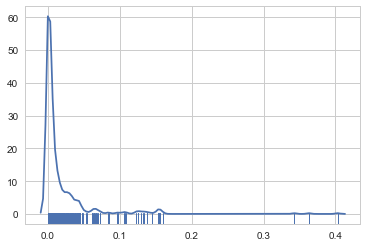

In [31]:
seaborn.distplot(_selector.scores_, hist=False, rug=True)

In [32]:
# Recursive Featurn Elimination

In [33]:
# - The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a 
# model on those attributes that remain. 

# - It uses the model accuracy to identify which attributes (and combination of attributes) contribute 
# the most to predicting the target attribute.

# - The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [34]:
_model = LinearRegression()

In [35]:
_rfe = RFE(_model, 10)

In [36]:
_x_train_rfe = _rfe.fit_transform(_X_train, _Y_train)

In [37]:
print(_x_train_rfe.shape)
print(_rfe.n_features_)
print(len(_rfe.support_))
print(_rfe.support_)
print(len(_rfe.ranking_))
print(_rfe.ranking_)

(4209, 10)
10
563
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False Fa

In [38]:
# Principal Component Analysis

In [39]:
# - Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a 
# compressed form. 

# - Generally this is called a data reduction technique. 

# - A property of PCA is that you can choose the number of dimensions or principal components 
# in the transformed result.

In [40]:
_pca = PCA(n_components=10)

In [41]:
_x_train_pca = _pca.fit_transform(_X_train, _Y_train)

In [42]:
print(_x_train_pca.shape)
print(_pca.components_.shape)
'''
print(_rfe.n_features_)
print(len(_rfe.support_))
print(_rfe.support_)
print(len(_rfe.ranking_))
print(_rfe.ranking_)
'''

(4209, 10)
(10, 563)


'\nprint(_rfe.n_features_)\nprint(len(_rfe.support_))\nprint(_rfe.support_)\nprint(len(_rfe.ranking_))\nprint(_rfe.ranking_)\n'

In [43]:
# Random Projection

In [44]:
# Gaussian random projection

In [45]:
# with default eps=0.1, error for returning more features than in the dataset
_gaussian_random_projection = GaussianRandomProjection(eps=0.9)  

In [46]:
_x_train_gaussian_random_project = _gaussian_random_projection.fit_transform(_X_train, _Y_train)

In [47]:
_x_train_gaussian_random_project.shape

(4209, 206)

In [48]:
# with default eps=0.1, error for returning more features than in the dataset
_sparse_random_projection = SparseRandomProjection(eps=0.9)

In [49]:
_x_train_sparse_random_projection = _sparse_random_projection.fit_transform(_X_train, _Y_train)

In [50]:
_x_train_sparse_random_projection.shape

(4209, 206)

In [51]:
# Feature Agglomeration

In [52]:
_feature_agg = FeatureAgglomeration(n_clusters=10)

In [53]:
_X_feature_agg = _feature_agg.fit_transform(_X_train, _Y_train)

In [54]:
_X_feature_agg.shape

(4209, 10)

In [56]:
_X_feature_agg[:10,:]

array([[ 0.48387097,  0.18181818,  0.05555556,  0.7       ,  0.04597701,
         0.        ,  0.22222222,  0.6       ,  0.33333333,  0.25      ],
       [ 0.93548387,  0.54545455,  0.        ,  0.5       ,  0.02068966,
         0.        ,  0.05555556,  0.6       ,  0.33333333,  0.16666667],
       [ 0.70967742,  0.36363636,  0.16666667,  0.4       ,  0.06666667,
         0.25      ,  0.16666667,  0.8       ,  0.26666667,  0.5       ],
       [ 0.70967742,  0.36363636,  0.11111111,  0.1       ,  0.06206897,
         0.125     ,  0.11111111,  0.6       ,  0.2       ,  0.41666667],
       [ 0.74193548,  0.36363636,  0.16666667,  0.        ,  0.05747126,
         0.125     ,  0.16666667,  0.6       ,  0.2       ,  0.08333333],
       [ 0.83870968,  0.45454545,  0.05555556,  0.7       ,  0.0183908 ,
         0.375     ,  0.61111111,  0.        ,  0.        ,  0.        ],
       [ 0.90322581,  0.90909091,  0.38888889,  0.3       ,  0.02528736,
         0.125     ,  0.        ,  0.        